In [ ]:
!pip install kaggle
!pip install pygad

     |████████████████████████████████| 51kB 4.7MB/s 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale = 3)

다음 블록에서는 인증 정보를 삭제함.

In [ ]:
!mkdir ~/.kaggle
!echo '{"username":,"key":}' > ~/.kaggle/kaggle.json
!kaggle competitions download -c titanic

  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 49.4MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 3.53MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 30.1MB/s]


In [ ]:
ls

gender_submission.csv  sample_data/  test.csv  train.csv


In [ ]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


| column   | type    | values       | meaning                  |
| -------- | ------- | ------------ | ------------------------ |
| Survived | integer | 1, 0         | 1 = survived, 0 = dead   |
| Pclass   | integer | 1, 2, 3      | n등칸                    |
| Sex      | object  | male, female | 성별                     |
| Age      | float   | 연속적       | 나이                     |
| SibSp    | integer | 정량적       | 형제 자매의 수           |
| Parch    | integer | 정량적       | 부모 자식의 수           |
| Fare     | float   | 연속적       | 요금                     |
| Embarked | object  | S, C, Q      | 탑승지                   |
| Name     | object  | ㅎㅎ         | 이름 + 칭호 (Mrs / Miss) |

null인 항목
Embarked에 2, Age에 277, Cabin에 787

* Cabin은 손실된 값이 너무 많아 사용하지 않는다.
* Name으로 유부녀 / 미혼 여성을 구분해 평균으로 Age를 채우고, 남성은 평균값을 넣는다.
* Embarked는 더 살펴봐야 알 수 있을 듯 하다. (티켓? 이름? 이걸로 안되면 2 row 포기)


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap=plt.cm.autumn.reversed())

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [ ]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap=plt.cm.autumn.reversed())

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


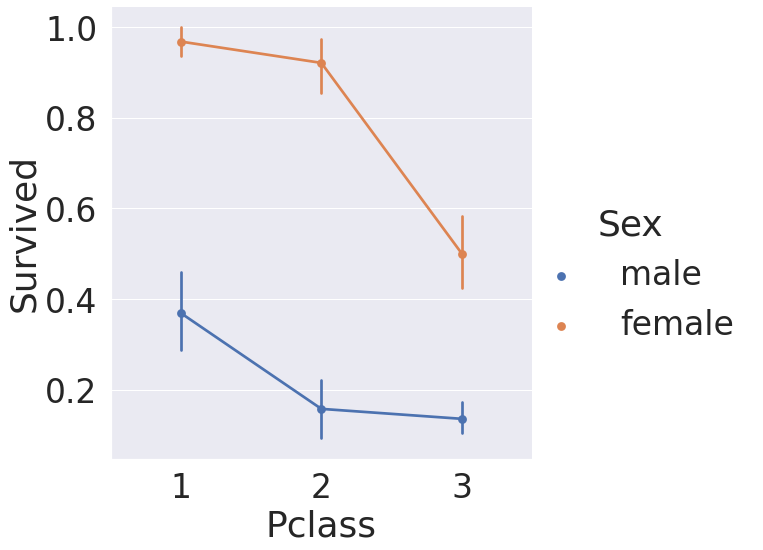

In [ ]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=8)

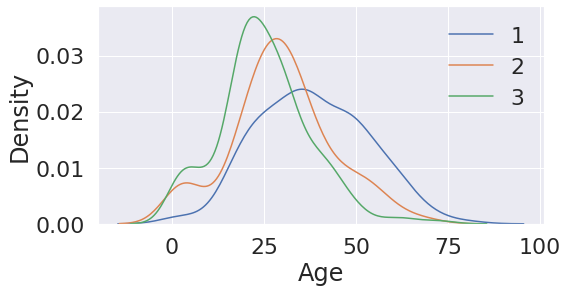

In [ ]:
sns.set(font_scale = 2)
f, ax = plt.subplots(1, 1, figsize = (8, 4))
[sns.kdeplot(df_train[df_train['Pclass'] == i]['Age'], ax=ax) for i in range(1, 4)]
plt.legend([str(i) for i in range(1,4)])
plt.show()

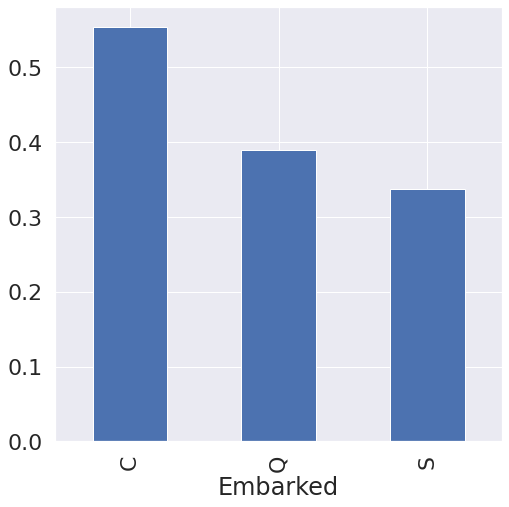

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
df_train.groupby(['Embarked']).mean().Survived.plot.bar(ax=ax)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


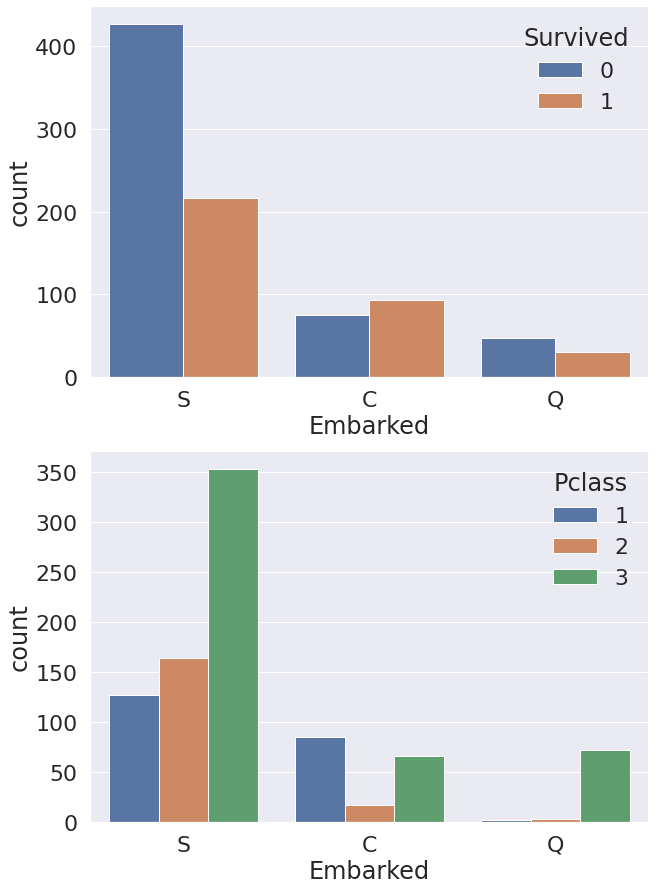

In [ ]:
f, ax = plt.subplots(2, 1, figsize=(10, 15))
sns.countplot('Embarked', hue = 'Survived', data=df_train, ax= ax[0])
sns.countplot('Embarked', hue = 'Pclass', data=df_train, ax= ax[1])
plt.show()

In [ ]:
pd.crosstab([df_train.Embarked, df_train.Pclass],
            df_train.Survived, margins=True)

Survived           0    1  All
Embarked Pclass               
C        1        26   59   85
         2         8    9   17
         3        41   25   66
Q        1         1    1    2
         2         1    2    3
         3        45   27   72
S        1        53   74  127
         2        88   76  164
         3       286   67  353
All              549  340  889

S에서 탄 3등칸 승객은 (아마도 선실 위치가 몰려있다거나 해서)

다른 3등칸 승객과 비교해보아도 인원 수 대비 생존율이 더 낮은 것을 알 수 있다.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


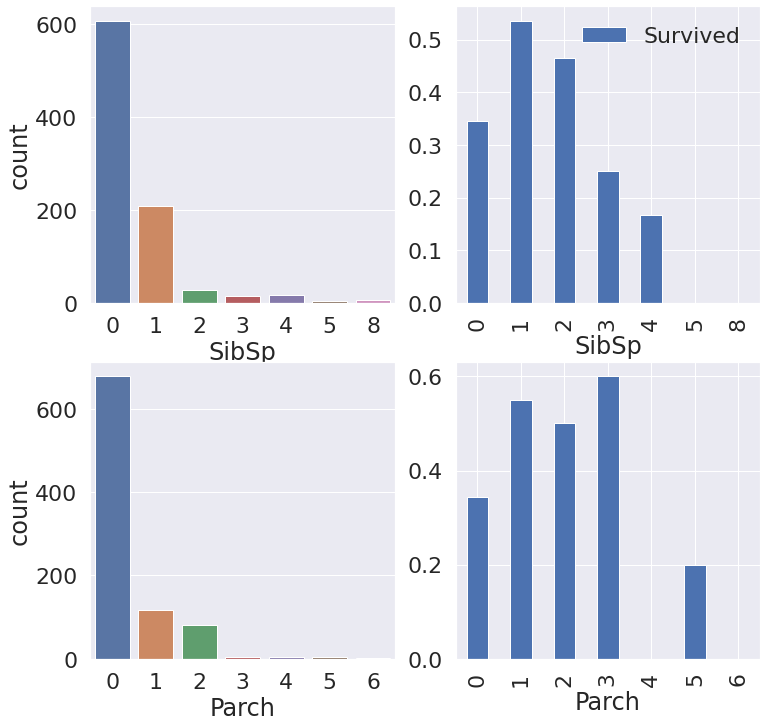

In [ ]:
f, ax = plt.subplots(2, 2, figsize=(12, 12))
sns.countplot('SibSp', data=df_train, ax=ax[0,0])
df_train[['SibSp', 'Survived']].groupby(['SibSp']).mean().plot.bar(ax=ax[0,1])
sns.countplot('Parch', data=df_train, ax=ax[1,0])
df_train[['Parch', 'Survived']].groupby(['Parch']).mean().plot.bar(ax=ax[1,1])
plt.legend().remove()

자녀가 없다 = 3등 승객인지 확인 필요

In [ ]:
pd.crosstab([df_train.SibSp, df_train.Pclass],
            df_train.Survived, margins=True)

Survived        0    1  All
SibSp Pclass               
0     1        60   77  137
      2        70   50  120
      3       268   83  351
1     1        18   53   71
      2        23   32   55
      3        56   27   83
2     1         1    4    5
      2         4    4    8
      3        10    5   15
3     1         1    2    3
      2         0    1    1
      3        11    1   12
4     3        15    3   18
5     3         5    0    5
8     3         7    0    7
All           549  342  891

In [ ]:
pd.crosstab([df_train.Parch, df_train.Pclass],
            df_train.Survived, margins=True)

Survived        0    1  All
Parch Pclass               
0     1        64   99  163
      2        86   48  134
      3       295   86  381
1     1        10   21   31
      2         8   24   32
      3        35   20   55
2     1         5   16   21
      2         3   13   16
      3        32   11   43
3     2         0    2    2
      3         2    1    3
4     1         1    0    1
      3         3    0    3
5     3         4    1    5
6     3         1    0    1
All           549  342  891

역시 범인은 3등 승객



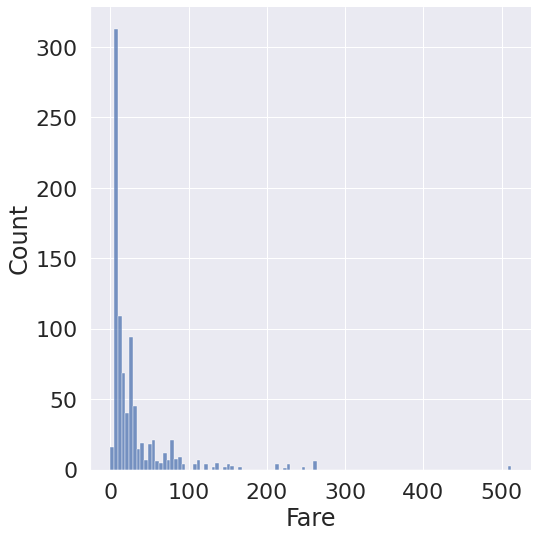

In [ ]:
df_train['Farelog'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Farelog'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

p = sns.displot(df_train['Fare'], height = 8, aspect = 1)

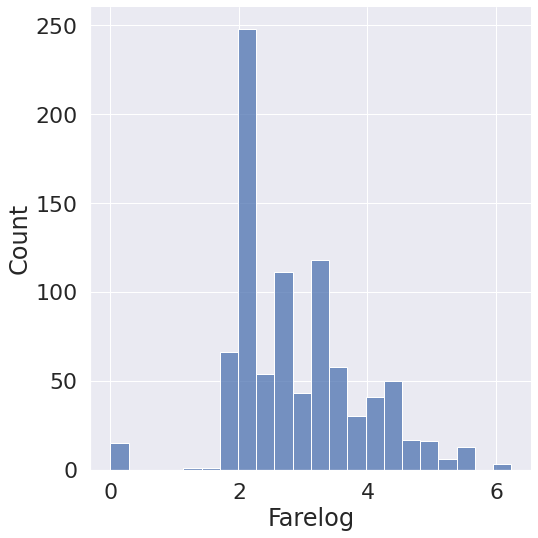

In [ ]:
p = sns.displot(df_train['Farelog'], height = 8, aspect = 1)

In [ ]:
df_train[(df_train['Age'].isnull()) & (~df_train['Name'].str.contains('Mr|Mrs|Miss'))]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Farelog
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C,2.724304
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S,4.242046
176,177,0,3,"Lefebre, Master. Henry Forbes",male,NaN,3,1,4133,25.4667,NaN,S,3.237372
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C,2.724304
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C,3.678829


In [ ]:
df_test[(df_test['Age'].isnull()) & (~df_test['Name'].str.contains('Mr|Mrs|Miss'))]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Farelog
88,980,3,"O'Donoghue, Ms. Bridget",female,NaN,0,0,364856,7.7500,NaN,Q,2.047693
244,1136,3,"Johnston, Master. William Arthur Willie""""",male,NaN,1,2,W./C. 6607,23.4500,NaN,S,3.154870
339,1231,3,"Betros, Master. Seman",male,NaN,0,0,2622,7.2292,NaN,C,1.978128
344,1236,3,"van Billiard, Master. James William",male,NaN,1,1,A/5. 851,14.5000,NaN,S,2.674149
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,3.107198


In [ ]:
mr = df_train[(~df_train['Age'].isnull()) & (df_train['Sex'] == "male")]['Age'].mean()
miss = df_train[(df_train['Name'].str.contains('Miss')) & (~df_train['Age'].isnull())]['Age'].mean()
mrs = df_train[(df_train['Name'].str.contains('Mrs')) & (~df_train['Age'].isnull())]['Age'].mean()
print(mr, miss, mrs)

30.72664459161148 21.773972602739725 35.642857142857146


In [ ]:
df_train.loc[df_train['Sex'] == 'male', 'Age'] = mr
df_train.loc[(df_train['Name'].str.contains('Miss')) & (df_train['Age'].isnull()), 'Age'] = miss
df_train.loc[(df_train['Name'].str.contains('Mrs')) & (df_train['Age'].isnull()), 'Age'] = mrs

In [ ]:
df_test.loc[(df_test['Sex'] == 'male') & (df_test['Age'].isnull()), 'Age'] = mr
df_test.loc[(df_test['Name'].str.contains('Miss|Ms')) & (df_test['Age'].isnull()), 'Age'] = miss
df_test.loc[(df_test['Name'].str.contains('Mrs')) & (df_test['Age'].isnull()), 'Age'] = mrs
df_test[df_test['Age'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Farelog


In [ ]:
df_train[df_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Farelog
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,4.382027
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,4.382027


그냥 많은 S로.
[검색](https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html)해보니 S에서 탄 것으로 확인되었다 (...)

In [ ]:
df_train.loc[df_train['Embarked'].isnull(), 'Embarked'] = 'S'
df_train[df_train['Ticket'] == '113572']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Farelog
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S,4.382027
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S,4.382027


In [ ]:
df_input = df_train[['Pclass', 'Sex', 'Age', 'Farelog', 'Embarked', 'SibSp', 'Parch']]
df_input['b_Sex'] = df_input['Sex'].apply(lambda x: 0 if x == 'male' else 1)
dict_embarked = {'S' : 0, 'C' : 1, 'Q' : 2}
df_input['b_Embarked'] = df_input['Embarked'].apply(lambda x: dict_embarked[x])
df_input.drop(['Embarked', 'Sex'], inplace=True, axis=1)
print(df_input)
df_output = df_train.Survived
print(df_output)
df_test_input = df_test[['Pclass', 'Sex', 'Age', 'Farelog', 'Embarked', 'SibSp', 'Parch']]
print(df_test_input[df_test_input.isna().any(axis=1)])
df_test_input['b_Sex'] = df_test_input['Sex'].apply(lambda x: 0 if x == 'male' else 1)
df_test_input['b_Embarked'] = df_test_input['Embarked'].apply(lambda x: dict_embarked[x])
df_test_input.drop(['Embarked', 'Sex'], inplace=True, axis=1)
print(df_test_input)

     Pclass        Age   Farelog  SibSp  Parch  b_Sex  b_Embarked
0         3  30.726645  1.981001      1      0      0           0
1         1  38.000000  4.266662      1      0      1           1
2         3  26.000000  2.070022      0      0      1           0
3         1  35.000000  3.972177      1      0      1           0
4         3  30.726645  2.085672      0      0      0           0
..      ...        ...       ...    ...    ...    ...         ...
886       2  30.726645  2.564949      0      0      0           0
887       1  19.000000  3.401197      0      0      1           0
888       3  21.773973  3.154870      1      2      1           0
889       1  30.726645  3.401197      0      0      0           1
890       3  30.726645  2.047693      0      0      0           2

[891 rows x 7 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64
Empty DataFrame
Columns: [Pclass, Sex, Age,

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [ ]:
print(df_input[df_input.isna().any(axis=1)])
print(df_test_input[df_test_input.isna().any(axis=1)])

Empty DataFrame
Columns: [Pclass, Age, Farelog, SibSp, Parch, b_Sex, b_Embarked]
Index: []
Empty DataFrame
Columns: [Pclass, Age, Farelog, SibSp, Parch, b_Sex, b_Embarked]
Index: []


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

in_train, in_valid, out_train, out_valid = train_test_split(df_input, df_output, test_size = 0.3, random_state=25252)
model = RandomForestClassifier()
model.fit(in_train, out_train)
prediction = model.predict(in_valid)
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(out_valid.shape[0], 100 * metrics.accuracy_score(prediction, out_valid)))

총 268명 중 82.09% 정확도로 생존을 맞춤


In [ ]:
!wget https://www.kaggleusercontent.com/kf/32704309/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..lW3EWKrXCGCKjPAZ4chSaA.xo6786b1WuQxkKpwoRgoq8eE8i9SYvzGEkOEDE2xeAy1c2_PI9iUvR-u7vih_w8J6oxzdoESTCfL6drQg4obg0IfsHqJFOrRjQ20JnhJltviNhU1V4wxCjiu_dap4xVertOT0-NdwAIL6zGDwjzvUoTJJmeXuLrBr6aAm45JSFUF86zaCfNHnSzHjimdi8du5vo0vPFM6gsHxgbnmow1ACV47SEnE3gE4cqPM22iCbxg6PJAtLd1fGNuPPqiH90lxVoSh9TfYq-vWV2htlCnJZJvmDaryQl_5vJlWdO5PnwtOJhjnnE425171ZEh3e85f5O3Faz4FPcqOOB3ucG1zp44blkJwPWLhhYVSNqNFxizd--M0dWn---WeJ-QCsE1uR-lWNardbs7Nh05P3FfQNG37Asaqe__fs9dIkQGphZRXZxrtZ_26zZzCkd0c5c84mlCmw9Is7414TZUMzE_d6JEar3182p2aEenXsBcGIwDn5lGQrtOqXZMnB2H5erOSPvKdJ9vCBTeNSD3hmUvsJJyGn9EU73dT-cyrAUR8Z_1eI9SJuA1tn1qNSQHzkVSEkBeUi0BLjeiqiCuFqEzV-tSENqG34sX2iQrWmPeWmffEv5IyhIc4MIGOQXbSvXD4CpoKquc8RklyjqkuCSb3vT_pDuG9tTzkQ619peXooYsugxOW_UabtfZLQ_mqaiy.DPady0Pl61RSRHeHjAqeKA/submission.csv

--2021-05-20 13:28:48--  https://www.kaggleusercontent.com/kf/32704309/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..lW3EWKrXCGCKjPAZ4chSaA.xo6786b1WuQxkKpwoRgoq8eE8i9SYvzGEkOEDE2xeAy1c2_PI9iUvR-u7vih_w8J6oxzdoESTCfL6drQg4obg0IfsHqJFOrRjQ20JnhJltviNhU1V4wxCjiu_dap4xVertOT0-NdwAIL6zGDwjzvUoTJJmeXuLrBr6aAm45JSFUF86zaCfNHnSzHjimdi8du5vo0vPFM6gsHxgbnmow1ACV47SEnE3gE4cqPM22iCbxg6PJAtLd1fGNuPPqiH90lxVoSh9TfYq-vWV2htlCnJZJvmDaryQl_5vJlWdO5PnwtOJhjnnE425171ZEh3e85f5O3Faz4FPcqOOB3ucG1zp44blkJwPWLhhYVSNqNFxizd--M0dWn---WeJ-QCsE1uR-lWNardbs7Nh05P3FfQNG37Asaqe__fs9dIkQGphZRXZxrtZ_26zZzCkd0c5c84mlCmw9Is7414TZUMzE_d6JEar3182p2aEenXsBcGIwDn5lGQrtOqXZMnB2H5erOSPvKdJ9vCBTeNSD3hmUvsJJyGn9EU73dT-cyrAUR8Z_1eI9SJuA1tn1qNSQHzkVSEkBeUi0BLjeiqiCuFqEzV-tSENqG34sX2iQrWmPeWmffEv5IyhIc4MIGOQXbSvXD4CpoKquc8RklyjqkuCSb3vT_pDuG9tTzkQ619peXooYsugxOW_UabtfZLQ_mqaiy.DPady0Pl61RSRHeHjAqeKA/submission.csv
Resolving www.kaggleusercontent.com (www.kaggleusercontent.com)... 35.190.26.106
Connecting to www.kaggleuserconte

In [ ]:
prediction = model.predict(df_test_input)
answer = pd.read_csv('submission.csv')
print( metrics.accuracy_score(prediction, answer.Survived))

0.7272727272727273


이 문제는 Leak이 있었던 지라 kaggle에 직접 submit하지 않아도 정확도를 확인할 수 있다.

대략 72/99.

같이보던? 노트북을 그대로 실행했을때 77.8% 정도가 나왔던 것을 생각하면 상당히 의미 없는 결과다. 60% 이상이 사망한 사건이므로 `모두 죽었어요`로 예측해도
그 정도의 정확도로 나올 것이므로 생각보다 더 의미없는 수준이다. 😢

근데 아무데나 넣어도 이것보다는 잘 나오지 않을까?

Generation = 1
Fitness    = 0.7227833894500562
Generation = 2
Fitness    = 0.7227833894500562
Generation = 3
Fitness    = 0.7227833894500562
Generation = 4
Fitness    = 0.7295173961840629
Generation = 5
Fitness    = 0.745230078563412
Generation = 6
Fitness    = 0.745230078563412
Generation = 7
Fitness    = 0.7508417508417509
Generation = 8
Fitness    = 0.7508417508417509
Generation = 9
Fitness    = 0.755331088664422
Generation = 10
Fitness    = 0.7721661054994389
Generation = 11
Fitness    = 0.7721661054994389
Generation = 12
Fitness    = 0.7800224466891134
Generation = 13
Fitness    = 0.7811447811447811
Generation = 14
Fitness    = 0.7811447811447811
Generation = 15
Fitness    = 0.792368125701459
Generation = 16
Fitness    = 0.792368125701459
Generation = 17
Fitness    = 0.7934904601571269
Generation = 18
Fitness    = 0.7934904601571269
Generation = 19
Fitness    = 0.7934904601571269
Generation = 20
Fitness    = 0.8002244668911336
Generation = 21
Fitness    = 0.8013468013468014
Genera

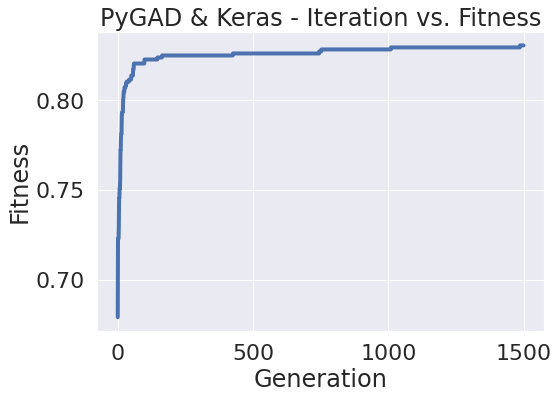

Fitness value of the best solution = 0.8305274971941639
Index of the best solution : 0
Train set Prediction :  0.8305274971941639
Test set Prediction :  0.7870813397129187


In [ ]:
import tensorflow.keras
import pygad
import pygad.kerasga

def absdiff(a, b):
    ret = len(b)
    for i, j in zip(a, b):
        i = 0 if i < 0.5 else 1
        if i != j:
            ret -= 1
    return ret / len(b)

def fitness_func(solution, sol_idx):
    global data_inputs, data_outputs, keras_ga, model

    model_weights_matrix = pygad.kerasga.model_weights_as_matrix(model=model,
                                                                 weights_vector=solution)

    model.set_weights(weights=model_weights_matrix)
    
    predictions = model.predict(data_inputs)

    return absdiff(predictions, data_outputs)

def callback_generation(ga_instance):
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))

input_layer  = tensorflow.keras.layers.Input(7)
dense_layer1 = tensorflow.keras.layers.Dense(14, activation="relu")(input_layer)
output_layer = tensorflow.keras.layers.Dense(1, activation="sigmoid")(dense_layer1)

model = tensorflow.keras.Model(inputs=input_layer, outputs=output_layer)

keras_ga = pygad.kerasga.KerasGA(model=model,
                                 num_solutions=49)

# Data inputs
data_inputs = df_input

# Data outputs
data_outputs = df_output

# Prepare the PyGAD parameters. Check the documentation for more information: https://pygad.readthedocs.io/en/latest/README_pygad_ReadTheDocs.html#pygad-ga-class
num_generations = 1500 # Number of generations.
num_parents_mating = 7 # Number of solutions to be selected as parents in the mating pool.
initial_population = keras_ga.population_weights # Initial population of network weights
parent_selection_type = "sss" # Type of parent selection.
crossover_type = "two_points" # Type of the crossover operator.
mutation_type = "random" # Type of the mutation operator.
mutation_percent_genes = 10 # Percentage of genes to mutate. This parameter has no action if the parameter mutation_num_genes exists.
keep_parents = -1 # Number of parents to keep in the next population. -1 means keep all parents and 0 means keep nothing.

ga_instance = pygad.GA(num_generations=num_generations, 
                       num_parents_mating=num_parents_mating, 
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       parent_selection_type=parent_selection_type,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       keep_parents=keep_parents,
                       on_generation=callback_generation)

ga_instance.run()

# After the generations complete, some plots are showed that summarize how the outputs/fitness values evolve over generations.
ga_instance.plot_result(title="PyGAD & Keras - Iteration vs. Fitness", linewidth=4)

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

# Fetch the parameters of the best solution.
best_solution_weights = pygad.kerasga.model_weights_as_matrix(model=model,
                                                              weights_vector=solution)
model.set_weights(best_solution_weights)
predictions = model.predict(data_inputs)
abs_error = absdiff(predictions, data_outputs)
print("Train set Prediction : ", abs_error)
predictions = model.predict(df_test_input)
abs_error = absdiff(predictions, answer.Survived)
print("Test set Prediction : ", abs_error)


역시 아무데나 넣어도 78.7% 정도의 정확도를 보여준다.

중간 레이어 활성화 함수를 삼각함수로 바꿔보고 싶지만 딱히 목표치가 있는게 아니라 GG.